# COGS 108 - Final Project

# Overview
Air pollution is a health hazard, estimated to cause 4-8 million premature deaths worldwide per year. However, deaths from air pollution are slowly declining. We proposed that the increased in sales of electric vehicles have decreased the amount of air pollutants, and thus decreased the amount of deaths from air pollution. In this project, we analyzed the relationship between air pollutants and deaths from air pollution, electric vehicles sales and air pollutants, and electric vehicle sales and deaths from air pollution.  

# Names

 - Pranaav Deshpande
 - Kin Lo
 - Bryce Lozinski
 - Jack Steussie

# Research Question 

How does an increase in electric vehicle production affect the amount of greenhouse gases in the air and the number of deaths caused by those air pollutants?

# Background and Prior Work

Air pollution is a major respiratory health risk; it has been linked to deaths in the U.S as well as decreasing life expectancy. The biggest contributor to air pollution are from automobiles, which releases high concentrations of greenhouse gases, such as $NO_{x}$, $PM_{2.5}$, $CO$, and $SO_{2}$ [1]. These greenhouse gases (GHG) are detrimental to the environment as well as human health. Most vehicles release these air pollutants when they are being driven. The average vehicle releases 4.6 metric tons of carbon dioxide per year. However, electric vehicles produce fewer emissions as it does not emit exhaust from the tailpipe [2]. 

The number of electric vehicles have exponentially increased from 2011 - 2019 [3][4], while the average air pollutants concentrations in the U.S has steadily declined and air quality has been improving [5]. Studies have found that adopting electric vehicles has a positive impact on air quality by reducing carbon and other pollutants emissions [6]. 

References:
1. https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle
2. https://www.energy.gov/eere/electricvehicles/reducing-pollution-electric-vehicles
3. https://www.eei.org/issuesandpolicy/electrictransportation/Documents/EV_%20Sales%20Facts%20and%20Figures.pdf
4. https://afdc.energy.gov/data/10567
5. https://gispub.epa.gov/air/trendsreport/2018/#highlights
6. https://www.sciencedaily.com/releases/2019/04/190412122912.htm

# Hypothesis

The introduction of electric cars have significantly decreased deaths from air pollution because electric cars are reducing the amount of emissions and particulate matter that are being produced, so people are not breathing in harmful pollutants.

# Dataset

1. 
    - Dataset Name: Air Pollutant Concentrations (emissions.csv)
    - Link to the dataset: https://gispub.epa.gov/air/trendsreport/2018/#highlights
    - Number of observations: 29 rows with 8 columns
    - Description: This dataset contains 7 different pollutants and its annual average concentrations from 1990 to 2017. The 7 different pollutants are $NH_{3}$, $NO_{x}$, $PM_{2.5}$, $CO$, $SO_{2}$ and VOC.
     
2. 
    - Dataset Name: Electric Vehicles Sales (electric_vehicles.csv)
    - Link to the dataset: https://afdc.energy.gov/data/10567
    - Number of observations: 58 rows with 12 columns
    - Description: This dataset is comprised with different electric vehicles sales from 2011 to 2019. It includes the total amount of electric vehicles sold per model as well as the total amount of electric vehicles sold per year.

3. 
    - Dataset Name: Death Rates from Air Pollution (death_rates_air_pollution.csv)
    - Link to the dataset: https://ourworldindata.org/outdoor-air-pollution?fbclid=IwAR1ju409-T8VzRDViUoP0twZhE1qIo9wWE_iMXRHpPLrygIQDtPkJEDaT3A
    - Number of observations: 6469 rows with 8 columns
    - Description: This dataset contains the death rates per 100,000 deaths from 1990 to 2017 for every country. The death rates are separated by air pollution, indoor air pollution, outdoor particulate matter, and outdoor ozone pollution. We are interested in just the total air pollution.



# Setup

In [1]:
## Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

import glob

In [2]:
emissions = pd.read_csv('emissions.csv')
emissions

,year,CO,NH3,NOx,Direct PM2.5,Direct PM10,SO2,VOC
0,1990,143.605,4.320,25.165,2.327,3.217,23.065,23.125
1,1991,136.545,4.384,24.933,2.317,3.112,22.363,22.899
2,1992,134.506,4.443,25.027,2.344,3.140,22.073,22.659
3,1993,129.365,4.518,25.122,2.223,3.036,21.764,22.252
4,1994,124.469,4.589,24.968,2.183,2.989,21.332,21.932
5,1995,120.073,4.659,24.697,2.203,3.055,18.609,21.578
6,1996,114.356,4.727,24.382,2.003,2.638,18.370,19.001
7,1997,111.117,4.817,24.526,2.012,2.656,18.834,18.786
8,1998,108.726,4.940,24.176,1.981,2.585,18.939,18.136
9,1999,104.033,4.857,22.609,2.700,3.198,17.478,17.603


In [3]:
death_rates = pd.read_csv('death_rates_air_pollution.csv')
death_rates

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173


In [4]:
ev_sales = pd.read_csv('electric_vehicles.csv')
ev_sales

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
2,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
3,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
4,BMW Active E,EV,-,673,-,-,-,-,-,-,-,673
5,Prius PHEV,PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630","116,927"
6,Ford Focus EV,EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-,"9,245"
7,Honda Fit EV,EV,-,93,569,407,2,-,-,-,-,"1,071"
8,Tesla Model S,EV,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090","162,285"
9,Toyota RAV4 EV,EV,-,192,"1,005","1,184",18,-,-,-,-,"2,399"


# Data Cleaning

Describe your data cleaning steps here.

In [5]:
# cleaning emissions data
print(emissions.isna().any())
emissions = emissions.rename({'Direct PM2.5':'PM2.5'}, axis='columns')
emissions = emissions.rename({'Direct PM10':'PM10'}, axis='columns')
emissions
# particles in million tons

year            False
CO              False
NH3             False
NOx             False
Direct PM2.5    False
Direct PM10     False
SO2             False
VOC             False
dtype: bool


,year,CO,NH3,NOx,PM2.5,PM10,SO2,VOC
0,1990,143.605,4.320,25.165,2.327,3.217,23.065,23.125
1,1991,136.545,4.384,24.933,2.317,3.112,22.363,22.899
2,1992,134.506,4.443,25.027,2.344,3.140,22.073,22.659
3,1993,129.365,4.518,25.122,2.223,3.036,21.764,22.252
4,1994,124.469,4.589,24.968,2.183,2.989,21.332,21.932
5,1995,120.073,4.659,24.697,2.203,3.055,18.609,21.578
6,1996,114.356,4.727,24.382,2.003,2.638,18.370,19.001
7,1997,111.117,4.817,24.526,2.012,2.656,18.834,18.786
8,1998,108.726,4.940,24.176,1.981,2.585,18.939,18.136
9,1999,104.033,4.857,22.609,2.700,3.198,17.478,17.603


In [6]:
# trimming total car data
ev_sales = ev_sales.transpose()
ev_sales = ev_sales.reset_index()
ev_sales = ev_sales.drop([0,1])

# putting total cars into new dataframe
totalcar = pd.DataFrame()
totalcar['year'] = ev_sales['index']
totalcar['cars'] = ev_sales[55]
totalcar = totalcar.reset_index()
totalcar = totalcar.drop(['index'], axis=1)
totalcar = totalcar.drop([7, 8, 9])
totalcar = totalcar.replace(',','', regex=True)
totalcar = totalcar.apply(pd.to_numeric)
print(totalcar)

   year    cars
0  2011   17763
1  2012   53171
2  2013   97102
3  2014  118882
4  2015  114023
5  2016  159616
6  2017  195581


The original csv file was transposed so that the years and the total number of cars could be used as columns instead of rows. All other categories besides year and total number of EVs were removed. Only the years from 2011 to 2017 were kept to match the years from our emissions data.

In [7]:
death_rates = death_rates[death_rates['Entity'] == 'United States']
death_rates = death_rates.drop(['Entity','Code', 'Indoor air pollution (deaths per 100,000)', 'Outdoor particulate matter (deaths per 100,000)', 'Outdoor ozone pollution (deaths per 100,000)'], axis=1)
death_rates = death_rates.apply(pd.to_numeric)
death_rates = death_rates[death_rates['Year'] >= 2011]
death_rates = death_rates.rename({'Air pollution (total) (deaths per 100,000)':'Total Deaths'}, axis='columns')
death_rates = death_rates.reset_index()
death_rates = death_rates[['Year', 'Total Deaths']]
print(death_rates)
# deaths in 100,000s

   Year  Total Deaths
0  2011     23.396666
1  2012     21.981943
2  2013     21.278553
3  2014     20.270392
4  2015     19.951715
5  2016     18.805666
6  2017     18.825146


The original dataset included deaths from all over the world, but we were only interested in United States. We dropped all the other columns but air pollution (total) deaths because we wanted to compare deaths from air pollution to our other variables. All values were converted to numeric values to remove the possibility of working with objects.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

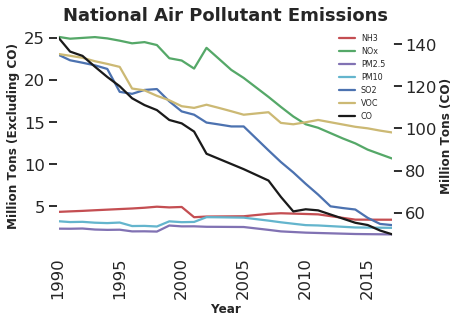

In [8]:
# emissions analysis
plt.figure()
ax = plt.axes()

# DATA EXCLUDING CO
NH3 = ax.plot(emissions['year'], emissions['NH3'], c='r', label='NH3')
NOx = ax.plot(emissions['year'], emissions['NOx'], c='g', label='NOx')
PM25 = ax.plot(emissions['year'], emissions['PM2.5'], c='m', label='PM2.5')
PM10 = ax.plot(emissions['year'], emissions['PM10'], c='c', label='PM10')
SO2 = ax.plot(emissions['year'], emissions['SO2'], c='b', label='SO2')
VOC = ax.plot(emissions['year'], emissions['VOC'], c='y', label='VOC')

# create title and axes
plt.title('National Air Pollutant Emissions', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Million Tons (Excluding CO)', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlim([1990, 2017])

# set background color
ax.set_facecolor(color='white')

# DATA CO
ax2 = ax.twinx()
CO = ax2.plot(emissions['year'], emissions['CO'], c='k', label='CO')
ax2.set_ylabel('Million Tons (CO)', fontsize=12, fontweight='bold')
ax2.grid(False)

# making legend for all data
lns = NH3+NOx+PM25+PM10+SO2+VOC+CO
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right', frameon=False, fontsize=8)

This graph shows the individual values of each emissions particle in million tons. The range for carbon monoxide (CO) emissions
is plotted on the right side of the graph because its range is much higher than the other emissions particle ranges.

In [9]:
# making new emissions dataset to show trend over years
# particles in million tons
new_emissions = emissions

new_emissions['Particles'] = new_emissions.loc[:, 'CO':'VOC'].sum(axis=1)
new_emissions = new_emissions.rename({'year':'Year'}, axis='columns')
new_emissions = new_emissions.loc[new_emissions['Year'] > 2010]
new_emissions = new_emissions.reset_index()
new_emissions = new_emissions[['Year', 'Particles']]

new_emissions

,Year,Particles
0,2011,105.589
1,2012,100.983
2,2013,97.571
3,2014,94.248
4,2015,91.217
5,2016,87.033
6,2017,84.247


The number of particulate emissions per year were summed and put into a new column. The individual particle columns were dropped so that only the data for the year and the total number of particles per year were kept. Only data from the years 2011 to 2017 were kept because our other datasets only have those years in common.

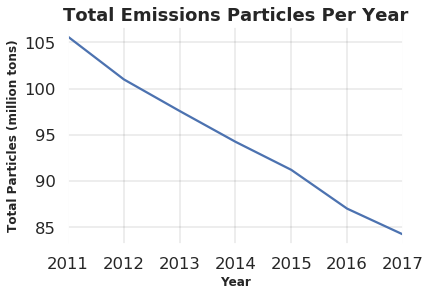

In [10]:
new_emissions.plot.line(x='Year', y='Particles', legend=None)
plt.title('Total Emissions Particles Per Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Particles (million tons)', fontsize=12, fontweight='bold')
plt.grid(False, c='k', alpha=0.1)
ax = plt.axes()
ax.set_facecolor(color='white')

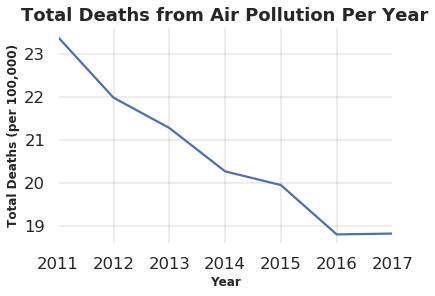

In [11]:
death_rates.plot.line(x='Year', y='Total Deaths', legend=None)
plt.title('Total Deaths from Air Pollution Per Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths (per 100,000)', fontsize=12, fontweight='bold')
plt.grid(False, c='k', alpha=0.1)
ax = plt.axes()
ax.set_facecolor(color='white')

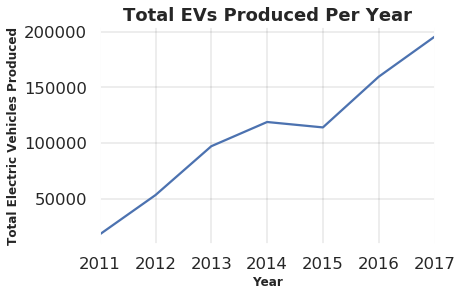

In [12]:
totalcar.plot.line(x='year', y='cars', legend=None)
plt.title('Total EVs Produced Per Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Electric Vehicles Produced', fontsize=12, fontweight='bold')
plt.grid(False, c='k', alpha=0.1)
ax = plt.axes()
ax.set_facecolor(color='white')

In [13]:
# Combine datasets into one dataframe for ease of access when plotting graphs and analyzing all the data
df_part_death = death_rates.join(emissions.set_index('year'), on='Year') 
df_part_death = df_part_death.rename(columns = {'Total Deaths' : 'Deaths'})

# Get the total particle count for all air pollutants combined per year and store in a column called particles
df_part_death['Particles'] = df_part_death.loc[:, 'CO':'VOC'].sum(axis=1)
df_part_death = df_part_death.drop(columns={'CO', 'NH3', 'NOx', 'PM2.5', 'PM10', 'SO2', 'VOC'})
df_part_death = df_part_death.set_index('Year')

# Convert the Cars column to integers because the data is in strings
df_part_death['Cars'] = totalcar['cars'].to_numpy() / 1000
df_part_death

# deaths are in the 100,000s
# particles are in the million tons
# cars are in the 1,000s

,Deaths,Particles,Cars
Year,,,
2011,23.396666,105.589,17.763
2012,21.981943,100.983,53.171
2013,21.278553,97.571,97.102
2014,20.270392,94.248,118.882
2015,19.951715,91.217,114.023
2016,18.805666,87.033,159.616
2017,18.825146,84.247,195.581


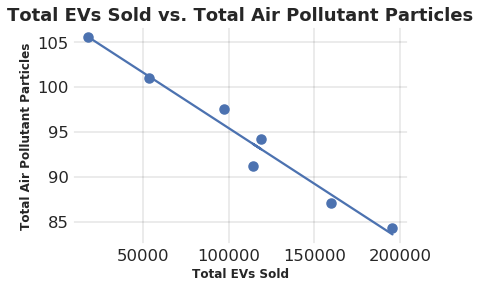

In [14]:
plt.figure()
ax = plt.axes()
plt.scatter(totalcar['cars'], df_part_death['Particles'])

plt.title('Total EVs Sold vs. Total Air Pollutant Particles', fontsize=18, fontweight='bold')
plt.xlabel('Total EVs Sold', fontsize=12, fontweight='bold')
plt.ylabel('Total Air Pollutant Particles', fontsize=12, fontweight='bold')

ax.set_facecolor(color='white')
ax.grid(True, color='black', alpha=0.1)
ax.tick_params(axis='both', color='black', length=1, width=1)

m, b = np.polyfit(totalcar['cars'], df_part_death['Particles'], 1)
x = totalcar['cars']
plt.plot(x, m*x + b)

Each point in this graph matches the total number of deaths that year to the number of EVs sold that year. When sales of electric vehicles were low, the total number of deaths due to air pollution were high, and vise versa. There is a negative correlation between the total number of deaths due to air pollution and the total number of EVs sold.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


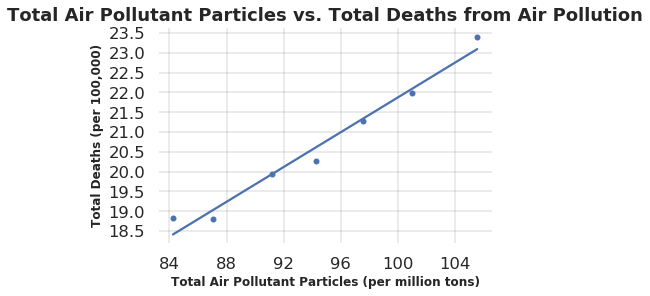

In [15]:
ax = plt.gca()
df_part_death.plot.scatter(x='Particles',y='Deaths',ax=ax)
ax.set_facecolor(color='white')
ax.grid(True, color='black', alpha=.1)
ax.locator_params(nbins=20)

plt.title('Total Air Pollutant Particles vs. Total Deaths from Air Pollution', fontsize=18, fontweight='bold')
plt.xticks(np.arange(84, 108, 4))
plt.xlabel('Total Air Pollutant Particles (per million tons)', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths (per 100,000)', fontsize=12, fontweight='bold')

m, b = np.polyfit(df_part_death['Particles'], df_part_death['Deaths'], 1)
x = df_part_death['Particles']
plt.plot(x, m*x + b)

We see that as total air pollutant particles rose, so did the number of total deaths in the United States. This depicts a positive correlation between total air pollutant particles and total deaths.

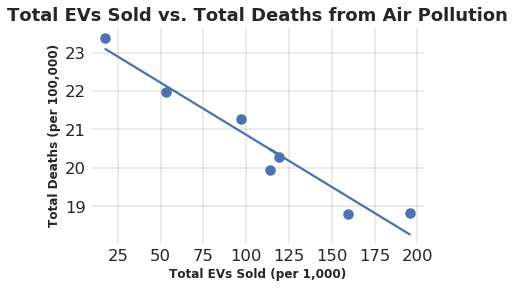

In [16]:
plt.figure()
ax = plt.axes()
plt.scatter(df_part_death['Cars'], df_part_death['Deaths'])

plt.title('Total EVs Sold vs. Total Deaths from Air Pollution', fontsize=18, fontweight='bold')
plt.xlabel('Total EVs Sold (per 1,000)', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths (per 100,000)', fontsize=12, fontweight='bold')

ax.set_facecolor(color='white')
ax.grid(True, color='black', alpha=0.1)
ax.tick_params(axis='both', color='black', length=1, width=1)
ax.locator_params(nbins=8)

m, b = np.polyfit(df_part_death['Cars'], df_part_death['Deaths'], 1)
x = df_part_death['Cars']
plt.plot(x, m*x + b)

As the number of total sales of electric vehicles increased, the total deaths decreased. This repesents a negative correlation between the total number of electric vehicles sold and the total number of deaths in the United States.

In [17]:
outcome, predictors = patsy.dmatrices('Particles ~ Cars', df_part_death)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Particles   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           7.95e-05
Time:                        18:59:47   Log-Likelihood:                -11.865
No. Observations:                   7   AIC:                             27.73
Df Residuals:                       5   BIC:                             27.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.7950      1.285     83.880      0.0

To support the correlation seen in the graph, the slope of the linear regression line (coefficient of 'cars') is negative, which means that as the total number of electric vehicles sold increased, the total number of particles decreased.

In [18]:
outcome, predictors = patsy.dmatrices("Deaths ~ Particles", df_part_death)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           3.57e-05
Time:                        18:59:47   Log-Likelihood:               -0.21522
No. Observations:                   7   AIC:                             4.430
Df Residuals:                       5   BIC:                             4.322
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0579      1.502     -0.039      0.9

To support the correlation seen in the graph, the slope of the linear regression line (coefficient of 'particles') is positive, which means that as the total number of air particles decreased, the total number of deaths from air pollution decreased.

In [19]:
outcome, predictors = patsy.dmatrices('Deaths ~ Cars', df_part_death)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Deaths   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     78.86
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           0.000301
Time:                        18:59:47   Log-Likelihood:                -3.1847
No. Observations:                   7   AIC:                             10.37
Df Residuals:                       5   BIC:                             10.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5789      0.372     63.405      0.0

To support the correlation seen in the graph, the slope of the linear regression line (coefficient of 'cars') is negative, which means that as the sales of EVs increased, the total number of deaths due to air pollution decreased.

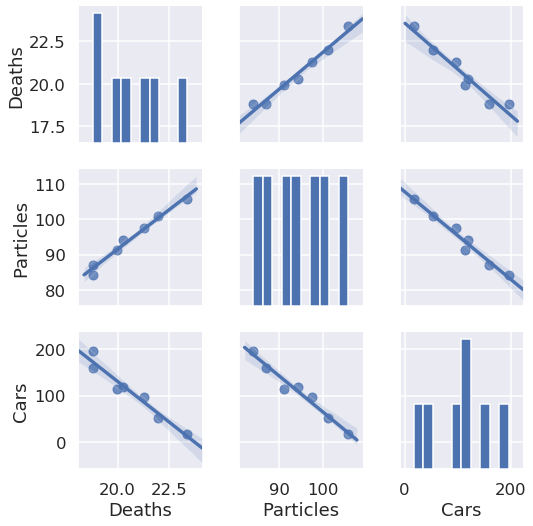

In [20]:
# Deaths per 100,000 and Particles per million tons
sns.pairplot(df_part_death, kind="reg")
plt.show()

This correlogram shows the overview of all the relationships between the different variables.

# Ethics & Privacy

Data involving air pollution trends was provided in the U.S Environmental Protection Agency and were collected by the  EPA, state, local, and tribal air pollution agencies. These data are intended for use in the regulartory, academic, and health research institutions only. All data from U.S EPA must be cited. 

All vehicles sales are released in different industry sales' reports, Electric Drive Transportation Association, InsideEVs, and HybridCars and are compiled by Argonne National Laboratory's Center for Transportation Research. Electric Edison Institute also uses InsideEVs and HybridCars. Sales are also reported to the U.S. Department of Energy’s Vehicle Technologies Office each month. Companies' sales' report are public and accessible through their website. 

Data from air pollution trends and electric vehicle sales were collected in the United States. These data do not include any personal information.

# Conclusion & Discussion

In conclusion, we saw a negative correlation over time between the number of electric vehicles produced in the United States per year and the number of deaths due to air pollution per year. We had a strong R-squared value for all of our OLS regressions, and we had low p-values as well. This shows a strong correlation between all of the variables in our analysis, but it does not necessarily show causation. This makes sense because the number of electric vehicles in circulation would have a small impact on how polluted the air is overall. This correlation is still important to point out however because it demonstrates that a push towards more environmentally friendly systems overall will probably have a major positive impact on air pollution and the population’s health. Deeper analysis and more data would be needed, but a study could be made to project the potential impact of factors like the use of different energy types combined with electric vehicles and more in the future. 

Our hypothesis was that there would be a strong correlation between car sales and deaths due to air pollution, and that turned out to be the case in the OLS regressions that we made. The correlations that we found between car sales, air pollution, and air pollution deaths support all previous research that we could find about air pollution and the effect electric cars have on the environment and the general population as a whole. Although we were not able to prove that electric cars have a direct effect on deaths due to air pollution purely through data, we were able to show that there is definitely a relationship between the two. 

It is also important to note the size of our data sets. We were pretty limited in what we could find since electric cars did not begin gaining much traction in the market until around 2011, hence why we reduced the range of all of our datasets to contain data from only 2011 to 2017. Realistically, we would have liked to work with more current data that went up to 2019, but our emissions data only went up to 2017. We also restricted our data to only the United States for both the purpose of simplicity and because some of the datasets we found were based only in the United States, such as our emissions dataset. If we did this project further in the future when there are potentially even more electric vehicles, we would potentially even be able to prove that electric vehicles have a direct and positive impact on the environment. 

# Team Contributions

 - Pranaav Deshpande: Data cleaning, EDA
 - Kin Lo: Background, EDA, ethics and privacy
 - Bryce Lozinski: Data cleaning, EDA
 - Jack Steussie: Data cleaning, EDA, conclusion